In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../data/processed/aadhaar_state_monthly.csv")
df["month"] = pd.to_datetime(df["month"])


In [26]:
df.columns

Index(['state', 'month', 'age_0_5', 'age_5_17', 'age_18_greater',
       'bio_age_5_17', 'bio_age_17_', 'demo_age_5_17', 'demo_age_17_',
       'enrolment_count', 'biometric_volume', 'demographic_volume',
       'child_ratio', 'adult_ratio', 'enrolment_change',
       'enrolment_rolling_mean'],
      dtype='object')

In [27]:
df = df.drop(columns=[
    "district_x", "district_y",
    "pincode_x", "pincode_y",
     'district', 'pincode'
])



KeyError: "['district_x', 'district_y', 'pincode_x', 'pincode_y', 'district', 'pincode'] not found in axis"

Code derived matrics

In [28]:
df["enrolment_count"] = (
    df["age_0_5"]
    + df["age_5_17"]
    + df["age_18_greater"]
)


In [29]:
df["biometric_volume"] = (
    df["bio_age_5_17"] + df["bio_age_17_"]
)


In [30]:
df['demographic_volume']= (df['demo_age_5_17'] + df['demo_age_17_'])


In [31]:
df["child_ratio"] = (
    df["demo_age_5_17"] / df["demographic_volume"]
)


In [32]:
df["adult_ratio"] = (
    df["demo_age_17_"] / df["demographic_volume"]
)


In [33]:
df["enrolment_change"] = (
    df.groupby("state")["enrolment_count"].pct_change()
)


Rolling features

In [34]:
df["enrolment_rolling_mean"] = (
    df.groupby("state")["enrolment_count"]
    .rolling(3, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)


In [ ]:
df.to_csv(
    "../data/processed/aadhaar_state_monthly.csv",
    index=False
)

Operational Enrolment Patterns
State wise enrolment demand

In [36]:
df.groupby("state")["enrolment_count"].sum().sort_values(ascending=False)


state
uttar pradesh                                         1018629
bihar                                                  609585
madhya pradesh                                         493970
West Bengal                                            375340
maharashtra                                            369139
rajasthan                                              348458
gujarat                                                280549
assam                                                  230197
karnataka                                              223235
tamil nadu                                             220789
jharkhand                                              157539
telangana                                              131574
Andhra Pradesh                                         127686
Odisha                                                 122987
meghalaya                                              109771
chhattisgarh                                           103219
ha

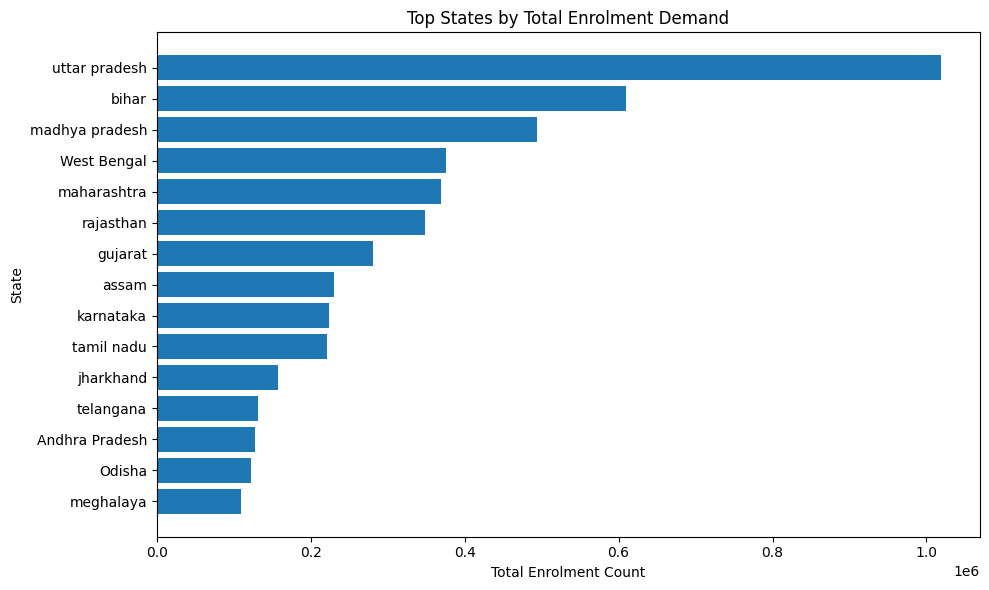

In [37]:

state_enrolmenttt = (
    df.groupby("state")["enrolment_count"]
    .sum()
    .sort_values(ascending=False)
    .head(15)   # Top 10–15 states
)

plt.figure(figsize=(10, 6))
plt.barh(state_enrolmenttt.index[::-1], state_enrolmenttt.values[::-1])

plt.title("Top States by Total Enrolment Demand")
plt.xlabel("Total Enrolment Count")
plt.ylabel("State")

plt.tight_layout()
plt.show()


Temporal Trends in Enrolment
National Enrollment trend

In [38]:
df.groupby("month")["enrolment_count"].sum()


month
2025-03-01      16582
2025-04-01     257438
2025-05-01     183616
2025-06-01     215734
2025-07-01     616868
2025-09-01    1475867
2025-10-01     817919
2025-11-01    1091996
2025-12-01     759464
Name: enrolment_count, dtype: int64

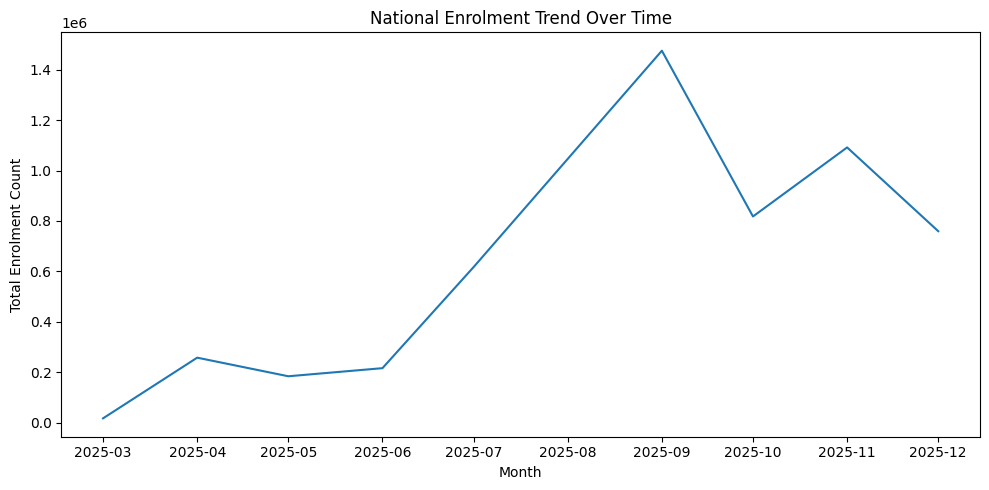

In [39]:

monthly_enrolment = (
    df.groupby("month")["enrolment_count"]
    .sum()
    .sort_index()
)


plt.figure(figsize=(10, 5))
plt.plot(monthly_enrolment.index, monthly_enrolment.values)

plt.title("National Enrolment Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Total Enrolment Count")

plt.tight_layout()
plt.show()


Biometric Operational Load
State wise biometric volume(to calculate infrastructure stress)

In [40]:
df.groupby("state")["biometric_volume"].sum().sort_values(ascending=False)


state
uttar pradesh                                         9577735
maharashtra                                           9226139
madhya pradesh                                        5923771
bihar                                                 4897587
tamil nadu                                            4698117
rajasthan                                             3994955
gujarat                                               3196514
chhattisgarh                                          2648729
karnataka                                             2635954
Andhra Pradesh                                        2605384
West Bengal                                           2524619
jharkhand                                             1793901
punjab                                                1739671
haryana                                               1635454
telangana                                             1568002
Odisha                                                1545406
de

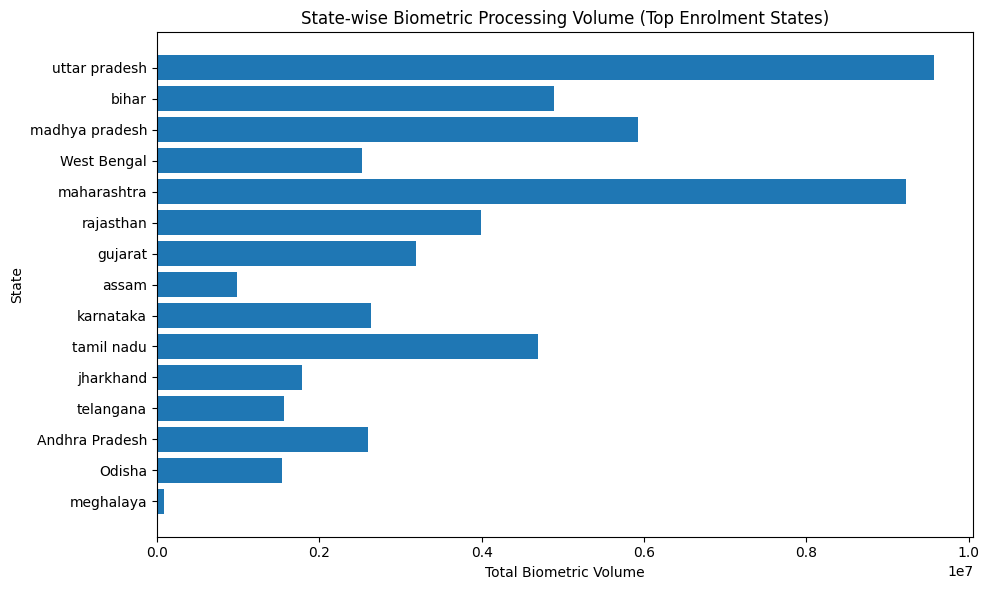

In [41]:

top_states = (
    df.groupby("state")["enrolment_count"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

state_biometric = (
    df[df["state"].isin(top_states)]
    .groupby("state")["biometric_volume"]
    .sum()
    .loc[top_states]   # maintain same order as enrolment chart
)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(state_biometric.index[::-1], state_biometric.values[::-1])

plt.title("State-wise Biometric Processing Volume (Top Enrolment States)")
plt.xlabel("Total Biometric Volume")
plt.ylabel("State")

plt.tight_layout()
plt.show()


Demographic Context(State wise child ratio)


In [43]:
 df.groupby("state")["child_ratio"].mean().sort_values()

state
andaman & nicobar islands                             0.011219
West Bengal                                           0.063472
punjab                                                0.064786
jharkhand                                             0.069375
bihar                                                 0.069659
chhattisgarh                                          0.077385
sikkim                                                0.077483
maharashtra                                           0.077933
tripura                                               0.079303
assam                                                 0.084389
dadra and nagar haveli and daman and daman and diu    0.085396
kerala                                                0.088199
goa                                                   0.089960
meghalaya                                             0.091284
Andaman and Nicobar Islands                           0.098139
rajasthan                                        

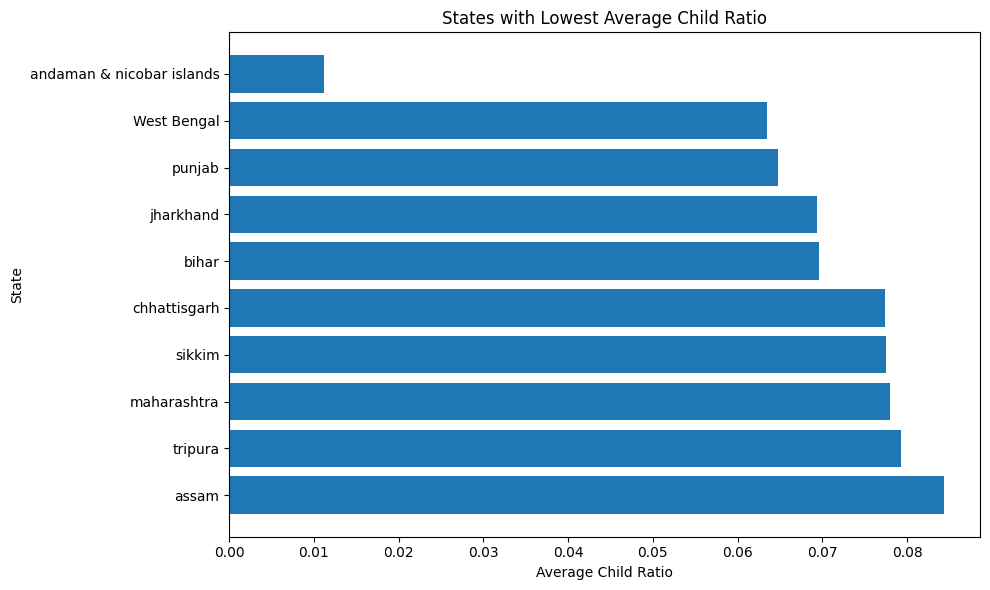

In [44]:

child_ratio_state = (
    df.groupby("state")["child_ratio"]
    .mean()
    .sort_values(ascending=True)
    .head(10)
)
plt.figure(figsize=(10, 6))
plt.barh(child_ratio_state.index[::-1], child_ratio_state.values[::-1])

plt.title("States with Lowest Average Child Ratio")
plt.xlabel("Average Child Ratio")
plt.ylabel("State")

plt.tight_layout()
plt.show()


In [19]:
latest_df = (
    df.sort_values("month")
    .groupby("state")
    .tail(1)
)


Demand vs Operational Load Relationship

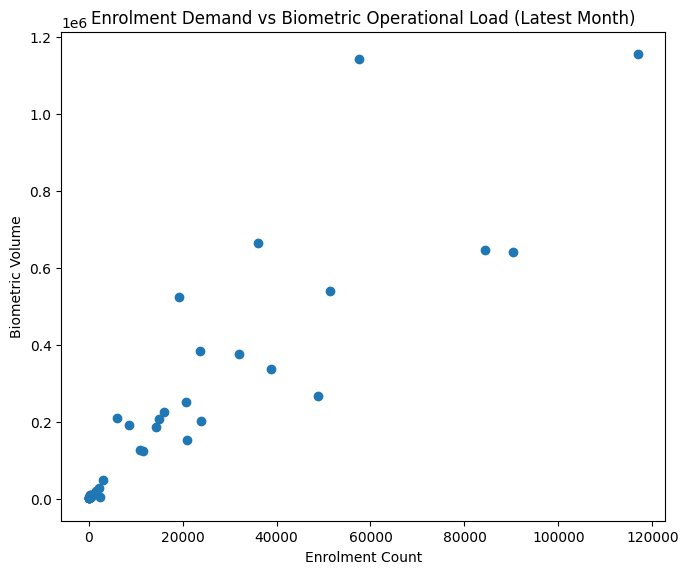

In [20]:
import matplotlib.pyplot as plt


plt.figure(figsize=(7, 6))
plt.scatter(
    latest_df["enrolment_count"],
    latest_df["biometric_volume"]
)

plt.title("Enrolment Demand vs Biometric Operational Load (Latest Month)")
plt.xlabel("Enrolment Count")
plt.ylabel("Biometric Volume")

plt.tight_layout()
plt.show()
